In [22]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [23]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [24]:
# Preprocess all train images
train_set = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28821 images belonging to 7 classes.


In [25]:
# Preprocess all test images
test_set = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 7066 images belonging to 7 classes.


In [26]:
# Configuration
input_shape = (48, 48, 1)
output_class = 7

In [27]:
# Model structure
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), padding='same',  input_shape=input_shape))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2Dpool_size=(2, 2)))
emotion_model.add(Dropout(0.5))

emotion_model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.5))

emotion_model.add(Flatten())

# Fully connected layer
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.25))

# Output layer
emotion_model.add(Dense(output_class, activation='softmax'))

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/best_emotion_model_3.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
reduced_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [28]:
# Check layers and parameters in the model
emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 


 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)     

In [29]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_set,
        steps_per_epoch=28821 // 64,
        epochs=50,
        validation_data=test_set,
        validation_steps=7066 // 64,
        callbacks=[early_stopping, model_checkpoint, reduced_learningrate])

Epoch 1/50
450/450 [==============================] - ETA: 0s - loss: 1.7805 - accuracy: 0.3214
Epoch 1: val_loss improved from inf to 1.81121, saving model to models/best_emotion_model_3.h5
450/450 [==============================] - 96s 210ms/step - loss: 1.7805 - accuracy: 0.3214 - val_loss: 1.8112 - val_accuracy: 0.2686 - lr: 0.0010
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 1.5728 - accuracy: 0.3936
Epoch 2: val_loss improved from 1.81121 to 1.52333, saving model to models/best_emotion_model_3.h5
450/450 [==============================] - 102s 226ms/step - loss: 1.5728 - accuracy: 0.3936 - val_loss: 1.5233 - val_accuracy: 0.4060 - lr: 0.0010
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 1.4926 - accuracy: 0.4264
Epoch 3: val_loss improved from 1.52333 to 1.49668, saving model to models/best_emotion_model_3.h5
450/450 [==============================] - 108s 239ms/step - loss: 1.4926 - accuracy: 0.4264 - val_loss: 1.4967 - val_accura

In [30]:
emotion_model.evaluate(x=test_set)

111/111 [==============================] - 8s 75ms/step - loss: 1.2453 - accuracy: 0.5433


[1.2452563047409058, 0.5433059930801392]

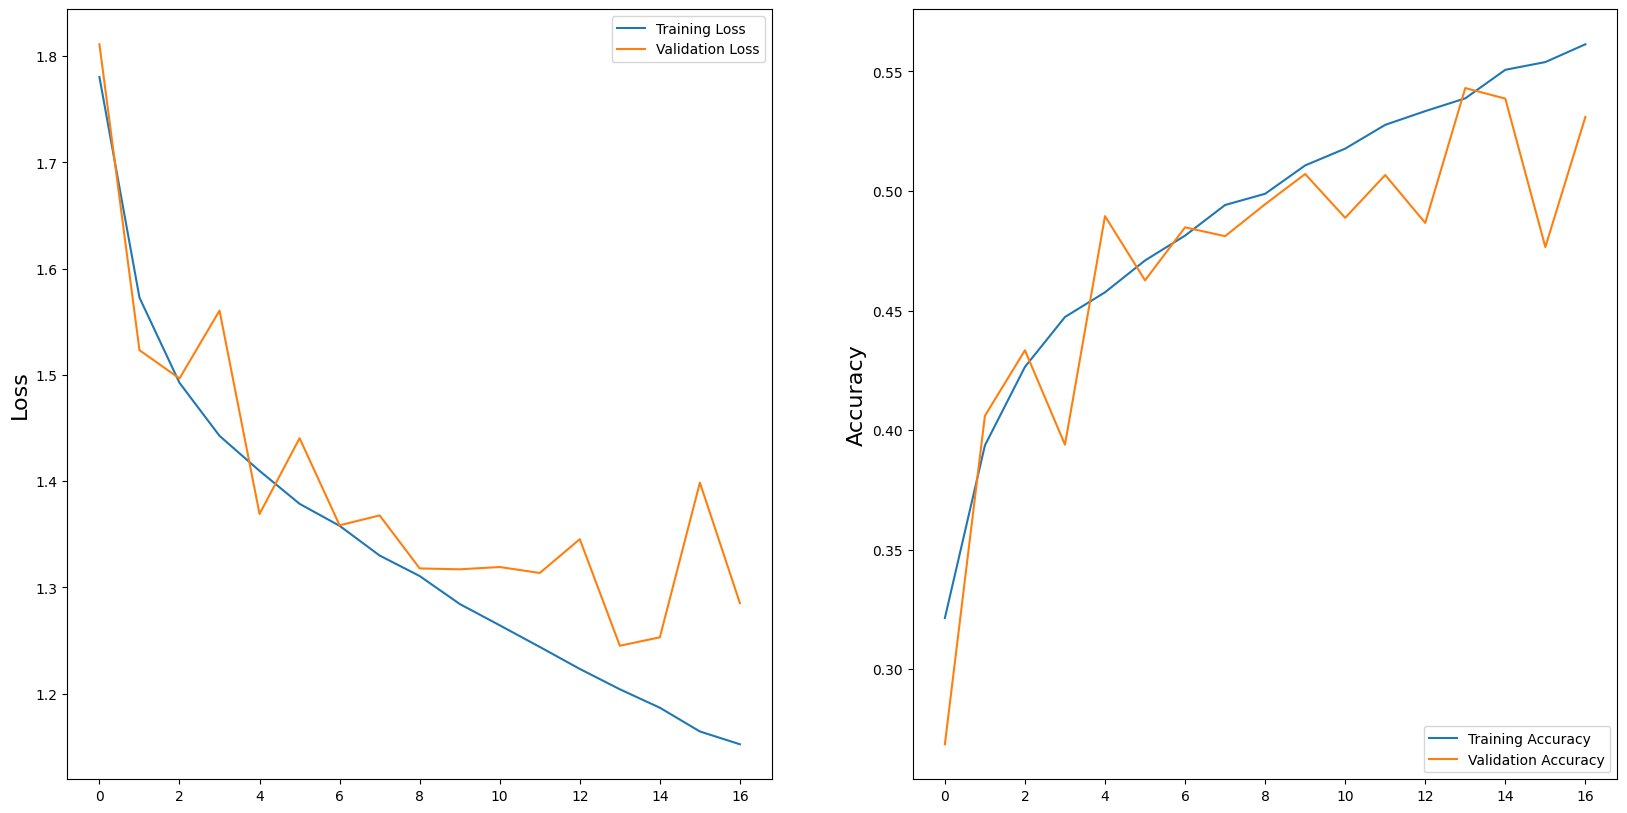

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy score
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [32]:
# Save trained model in .h5 file
emotion_model.save('models/emotion_model_3.h5')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
